# 01 - Data Loading & Exploratory Data Analysis (EDA)

**Goal:** Load the new dataset, understand its structure, check for quality issues (missing values, imbalance), and visualize distributions.

**Dataset:** `creditcard.csv` (Raw)
**Output:** Figures saved to `results/new_dataset_analysis/figures`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')

# Paths
DATA_DIR = Path('../data/raw')
FIG_DIR = Path('../results/new_dataset_analysis/figures')
FIG_DIR.mkdir(parents=True, exist_ok=True)

# File
FILE_NAME = 'creditcard.csv'
FILE_PATH = DATA_DIR / FILE_NAME

print(f"Loading data from: {FILE_PATH.resolve()}")

Loading data from: C:\Users\Faheem\Desktop\Github\bot\FYP2025-Fraud-Detection\data\raw\creditcard.csv


In [2]:
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Data Loaded Successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("ERROR: File not found.")

print(df.head())

Data Loaded Successfully. Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 

## 1. Quality Check

In [3]:
# Missing Values
missing = df.isnull().sum().sum()
print(f"Missing Values: {missing}")

# Duplicates
dupes = df.duplicated().sum()
print(f"Duplicate Rows: {dupes} ({dupes/len(df):.2%})")
# Note: We typically keep duplicates in fraud detection unless identical timestamp implies technical error, 
# but for this analysis, we will check if they are malicious.

# Target Distribution
target_col = 'Class' # Verified header
print(df[target_col].value_counts(normalize=True))

Missing Values: 0
Duplicate Rows: 1081 (0.38%)
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


## 2. Visualization

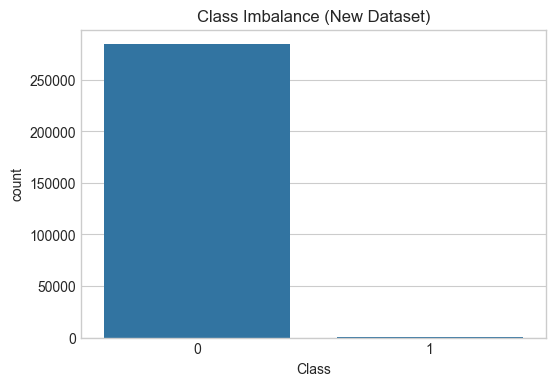

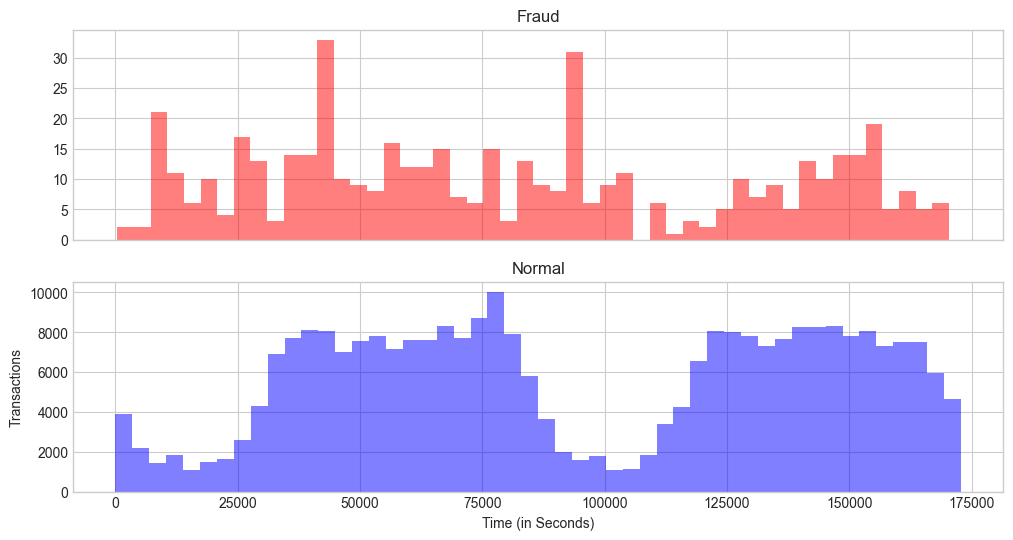

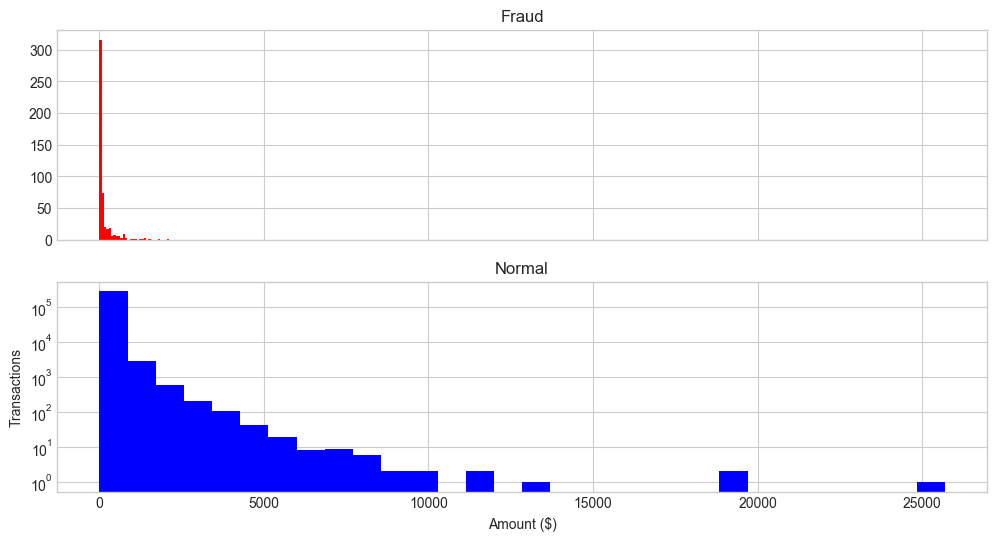

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title('Class Imbalance (New Dataset)')
plt.savefig(FIG_DIR / '01_new_class_imbalance.png')
plt.show()

# Time vs Class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.hist(df.Time[df.Class == 1], bins=50, color='red', alpha=0.5)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins=50, color='blue', alpha=0.5)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Transactions')
plt.savefig(FIG_DIR / '01_new_time_distribution.png')
plt.show()

# Amount vs Class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.hist(df.Amount[df.Class == 1], bins=30, color='red')
ax1.set_title('Fraud')
ax2.hist(df.Amount[df.Class == 0], bins=30, color='blue')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Transactions')
plt.yscale('log')
plt.savefig(FIG_DIR / '01_new_amount_distribution.png')
plt.show()